# 🛒 Amazon Product Data – Let's Explore!

Welcome! In this notebook, we’ll take a fun look at Amazon product data from India.  
We’ll explore:

- Prices and discounts 💰  
- Product ratings ⭐  
- Popular categories 📦  
- What people say in their reviews 📝

We’ll also do some light **sentiment analysis** = **(people's words in reviews)** to see how people feel about what they buy.

---

### 🎯 Objectives of This Analysis

1. **Clean and prepare** the product data for analysis  
2. **Understand price patterns** – including discounts and actual prices  
3. **Analyze customer ratings** and review counts  
4. **Identify popular product categories** based on rating activity  
5. **Perform sentiment analysis** on customer reviews to compare feelings across top-rated and low-rated products  
6. **Visualize insights** using plots and charts for easy interpretation

---

### 💾 About the Data
The dataset includes product listings from Amazon India with prices, ratings, and customer reviews.  
You can find it here: [Amazon Product Dataset on Kaggle](https://www.kaggle.com/code/mehakiftikhar/amazon-sales-dataset-eda)  

### 💱 Price Note
Prices in the data are in **Indian Rupees (INR)**.  
To give you a quick idea:  
**₹1000 ≈ $12 USD** *(as of recent exchange rates)*

---

Let’s jump in and see what we can learn! 📊


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("amazon.csv")  
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
# Shape and column names
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1465, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
# Define columns and their cleanup rules
clean_columns = {
    'discounted_price': ['₹', ','],
    'actual_price': ['₹', ','],
    'discount_percentage': ['%'],
    'rating_count': [',']
}

# Apply string replacement and convert to float
for col, chars in clean_columns.items():
    for ch in chars:
        df[col] = df[col].str.replace(ch, '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert 'rating' separately since it doesn't need character cleanup
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [6]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [7]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


There is a missing rating let is see it:

In [8]:
df[df.rating.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


I will check the actual rating on the website and just replace it with it:

In [9]:
# Link of product with missing rating
df.iloc[1279]['product_link']

'https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1/ref=sr_1_295?qid=1672923607&s=kitchen&sr=1-295'

In [10]:
df.at[1279, 'rating'] = 3.9

In [11]:
# check if null values are ZERO
df.rating.isnull().sum()

np.int64(0)

Now for the rating_count there are two null values:

In [12]:
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [13]:
# Their links to get the missing values:
print(df.iloc[282]['product_link'])
print(df.iloc[324]['product_link'])

https://www.amazon.in/Amazon-Brand-Charging-Suitable-Supported/dp/B0B94JPY2N/ref=sr_1_444?qid=1672909146&s=electronics&sr=1-444
https://www.amazon.in/REDTECH-Lightning-Certified-Charging-Compatible/dp/B0BQRJ3C47/ref=sr_1_491?qid=1672909149&s=electronics&sr=1-491


In [14]:
df.at[282, "rating_count"] = 61

The link of the second product is not working so let's just drop its entire row 

In [15]:
df.drop(index=324, inplace=True)

Check for null values (should be ZERO)

In [16]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

## Let's Look at the Basic statistics and See what we can notice:

In [18]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1464.000000,1464.000000,1464.000000,1464.000000,1464.000000
mean,3127.275567,5448.027514,47.672814,4.095833,18283.086066
std,6946.269985,10877.921405,21.631511,0.290761,42741.907662
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,32.000000,4.000000,1179.000000
50%,799.000000,1670.000000,50.000000,4.100000,5178.500000
75%,1999.000000,4303.750000,63.000000,4.300000,17330.750000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


## 📊 Data Summary Insights

Based on the summary statistics from `df.describe()`, here are key insights from the dataset:

---

### 💰 1. High Price Variability (Wide Price Range)
- **Discounted Price** ranges from ₹39 to ₹77,990.
- **Actual Price** ranges from ₹39 to ₹139,900.
- **Standard deviations** are very high, indicating wide variance in product prices.

**Insight:**  
The dataset includes a mix of budget and premium products. It may be valuable to segment products into price tiers (e.g., budget, midrange, premium) for better analysis.

---

### 🎯 2. Steep Average Discounts
- **Average Discount Percentage** is ~47.7%.
- Discounts go as high as **94%**, and the median is **50%**.

**Insight:**  
Heavy discounting is common, possibly indicating a highly competitive market or artificially inflated MRPs (Some sellers might set a very high “actual price” (MRP – Maximum Retail Price) on purpose). This could affect customer perception and pricing strategies.

---

### ⭐ 3. Consistently High Ratings
- **Average Rating** is ~4.1.
- **Low standard deviation** (~0.29) suggests ratings don’t vary much.
- **75% of products** are rated **4.3 or less**.

**Insight:**  
Customer feedback is generally positive. Rating may not be a strong differentiator unless combined with review sentiment or volume.

---

### 👥 4. Skewed Rating Counts
- **Mean Rating Count** is 18,283, but standard deviation is **42,742**.
- Some products have **over 426,000** ratings.

**Insight:**  
A few products dominate in popularity (likely a long-tail distribution). Consider separating "top sellers" from the rest or using log transformation for `rating_count`.

---

### 🧠 Suggestions for Further Analysis
- Create a **correlation heatmap** to explore relationships between price, discounts, and ratings.
- Analyze **top discounted products** and their ratings.
- Perform **category-level breakdowns** to identify trends.
- Investigate if **review volume** correlates with trust (higher/lower ratings).


## 1st suggestion: Correlation heatmap:

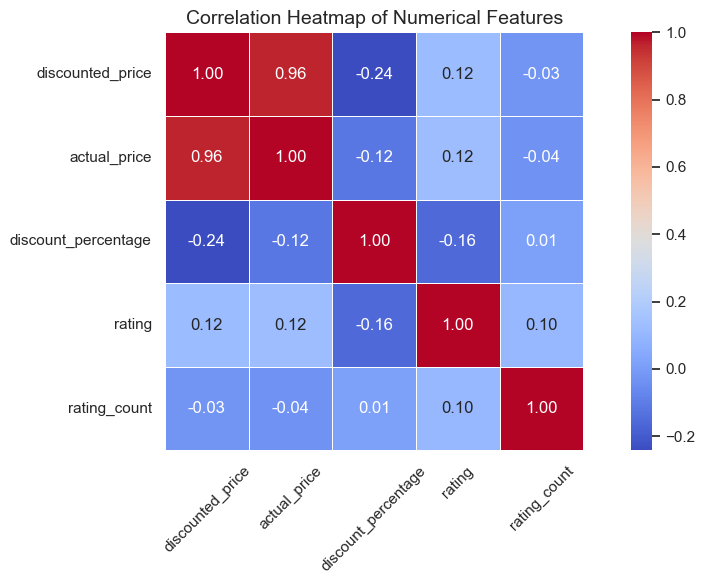

In [19]:
# Select only numeric columns for correlation
numeric_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 🧠 Insights from the Correlation Matrix

- **Discounted Price and Actual Price** have a **strong positive correlation (0.96)** — higher actual prices tend to have higher discounted prices. And that is pretty normal
- **Discount Percentage** is **negatively correlated** with both prices (actual and discounted) — larger discounts are typically seen on lower-priced items.
- **Rating and Rating Count** have a **weak positive correlation (0.10)** — more reviews don’t significantly impact ratings, as we first thought.
- **Discount Percentage** and **Rating** have a **weak negative correlation (-0.16)** — heavily discounted products may receive slightly lower ratings.


### As Discounted Price & Actual Price have a strong correlation the graphs would be pretty similar

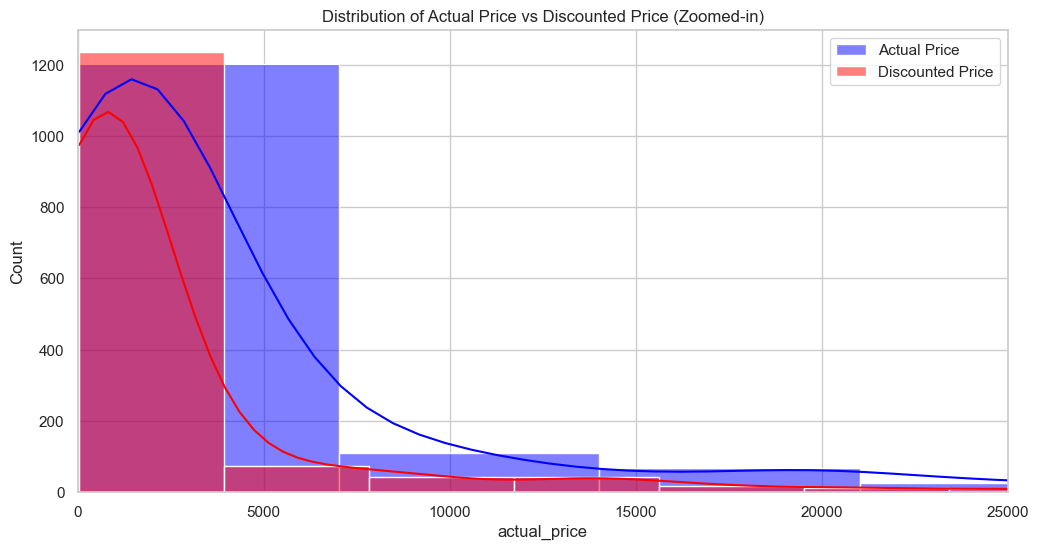

In [20]:
# Plot distribution of actual and discounted prices with zoomed x-axis
plt.figure(figsize=(12, 6))

# Plot actual price and discounted price
sns.histplot(df['actual_price'], kde=True, color='blue', label='Actual Price', bins=20)
sns.histplot(df['discounted_price'], kde=True, color='red', label='Discounted Price', bins=20)

# Add zoomed-in x-axis limits (adjust values as needed to zoom in more/less)
plt.xlim(0, 25000)  # Example: Focus on prices between 0 and 5000

# Customize the plot
plt.legend()
plt.title('Distribution of Actual Price vs Discounted Price (Zoomed-in)')
plt.show()


### 📉 Observation: Price Distribution Skewed Right

From the histogram above, we observe that both **actual prices** and **discounted prices** are **right-skewed**:

- The **majority of product prices** fall between **₹0 and ₹7,500**.
- A **long tail** extends toward higher prices, indicating a few products are significantly more expensive.
- This skewness can distort summary statistics like the mean, making it **higher than the median**.
- For better visualization or modeling, applying a **log transformation** to price data can help normalize the distribution.

Next step: We can visualize the **log-transformed prices** to see if it improves the symmetry of the data.


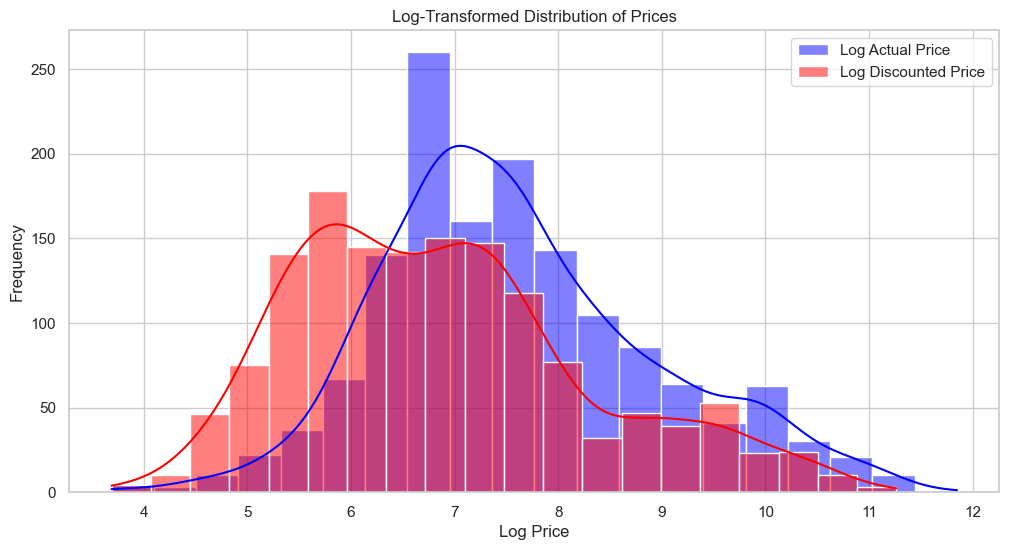

In [21]:
# Create log-transformed columns (use log1p to handle zeros safely)
df['log_actual_price'] = np.log1p(df['actual_price'])
df['log_discounted_price'] = np.log1p(df['discounted_price'])

# Plot the log-transformed distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['log_actual_price'], kde=True, color='blue', label='Log Actual Price', bins=20)
sns.histplot(df['log_discounted_price'], kde=True, color='red', label='Log Discounted Price', bins=20)
plt.legend()
plt.title('Log-Transformed Distribution of Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

### 🧮 Interpreting the Log-Transformed Axis

After applying the log transformation, the distribution of both actual and discounted prices is now **much more symmetric**.

- The **central value** on the x-axis is around **7**.
- Since we used `log1p` (i.e., log(1 + x)), this corresponds to a real-world price of approximately **₹1,100**:

    \[
       e^7 - 1 = 1095 (approximatly)
    \]

- This confirms that most product prices are centered around ₹1,000–₹1,100.
- The transformation helps remove the long tail of high prices and **normalizes the data** for further analysis or modeling.



## Category-wise Analysis 
- Group products by categories, we have more than 200 categories:
  - Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear
  - Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
  - ...
- And sort them by the rating_count ==> a good indicator of how much was sold

In [22]:
# Group by 'category' and compute summary statistics
category_group = df.groupby('category').agg({
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).sort_values(by='rating_count', ascending=False)

# Display top categories by total rating count (proxy for popularity)
category_group.head(10)


,actual_price,discounted_price,discount_percentage,rating,rating_count
category,,,,,
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",2960.076923,976.173077,58.269231,3.898077,4204939.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,905.622069,361.205259,59.310345,4.148276,3547877.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,20593.397059,15754.441176,23.294118,4.100000,2493269.0
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",1175.250000,406.291667,59.791667,4.254167,1906054.0
Electronics|WearableTechnology|SmartWatches,8554.763158,2339.697368,69.815789,4.025000,1644476.0
Electronics|Accessories|MemoryCards|MicroSD,2169.000000,839.769231,58.846154,4.330769,1113592.0
Computers&Accessories|ExternalDevices&DataStorage|PenDrives,1660.000000,668.600000,56.900000,4.260000,774744.0
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",40132.841270,24840.190476,38.285714,4.209524,760279.0
Computers&Accessories|NetworkingDevices|NetworkAdapters|WirelessUSBAdapters,1388.444444,722.111111,49.111111,4.094444,727113.0


### 📊 Electronics Dominate Review Volume: Insights

We can notice that:

- **Electronics and Computer Accessories dominate**, holding all top 10 spots by review count.
- Items like **earbuds**, **cables**, **memory cards**, and **chargers** show massive engagement despite lower prices, indicating frequent purchases or impulse buys.
- **Smartphones** and **smartwatches** are also highly rated and reviewed, proving strong demand even at mid-to-high price points.
- Categories such as **MicroSD cards** and **Pen Drives** have both **high volume and high ratings**, suggesting excellent product-market fit.
- These findings can guide strategies around inventory focus, bundling, and promotional priorities within electronics.

Next step: group these into broader categories like "Electronics", "Computers", etc., to better understand segment-wise dynamics.


## Main categories Analysis
NOT `Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear`
But just `Electronics`

In [23]:
# Extract the top-level category (before the first '|')
df['main_category'] = df['category'].apply(lambda x: x.split('|')[0])

# Check the first few rows to ensure it worked
df[['category', 'main_category']].head()


,category,main_category
0,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
2,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
3,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories
4,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories


### Let's get simple statistcs for main groups:

In [24]:
# Group by 'main_category' and compute summary statistics
main_category_group = df.groupby('main_category').agg({
    'actual_price': 'mean',
    'discounted_price': 'mean',
    'discount_percentage': 'mean',
    'rating': 'mean',
    'rating_count': 'sum'
}).sort_values(by='rating_count', ascending=False)

# Display the top categories by rating count (proxy for popularity)
main_category_group


,actual_price,discounted_price,discount_percentage,rating,rating_count
main_category,,,,,
Electronics,10127.311787,5965.887833,50.828897,4.081749,15778848.0
Computers&Accessories,1685.137788,843.963761,53.977876,4.153097,7728750.0
Home&Kitchen,4162.073661,2330.615647,40.120536,4.040402,2991069.0
OfficeProducts,397.193548,301.580645,12.354839,4.309677,149675.0
MusicalInstruments,1347.000000,638.000000,46.000000,3.900000,88882.0
Toys&Games,150.000000,150.000000,0.000000,4.300000,15867.0
HomeImprovement,799.000000,337.000000,57.500000,4.250000,8566.0
Health&PersonalCare,1900.000000,899.000000,53.000000,4.000000,3663.0
Car&Motorbike,4000.000000,2339.000000,42.000000,3.800000,1118.0



### Let's Visulize the rating_count for each group

There are only 9 main categories in the dataset but I will say top 10 😬

C:\Users\alpha\AppData\Local\Temp\ipykernel_352\2389316864.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_main_categories.index, y=top_main_categories['rating_count'], palette='viridis')


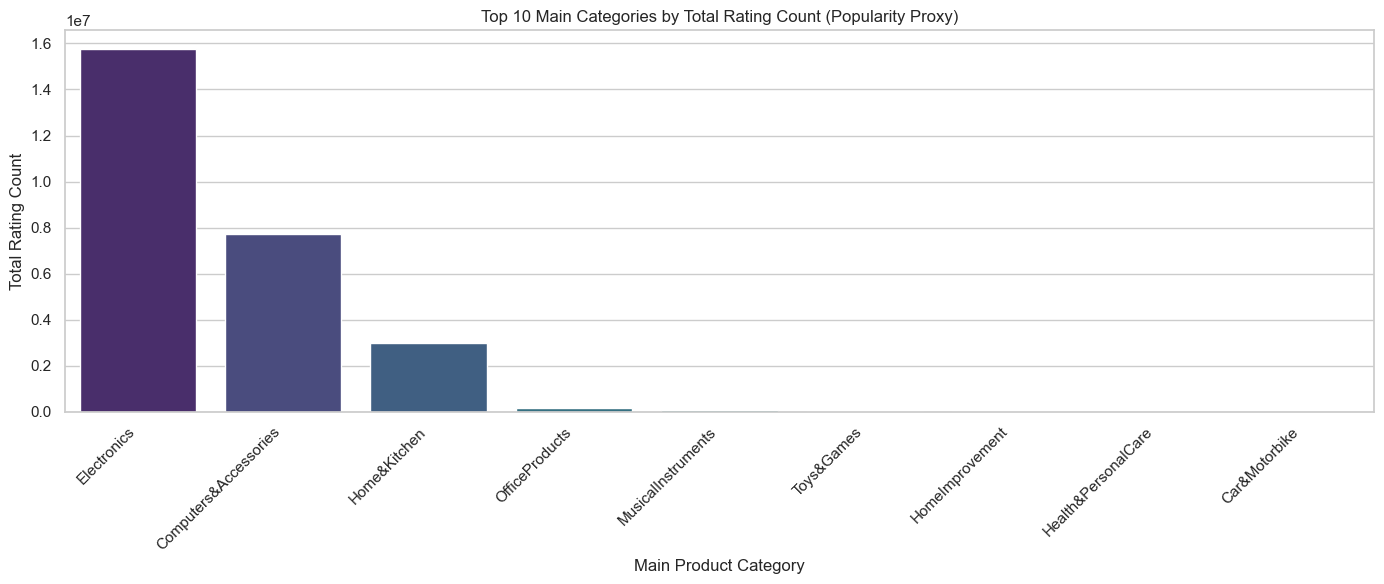

In [25]:
# Top 10 categories by rating count
top_main_categories = main_category_group.head(10)

# Bar plot for total rating count by main category
plt.figure(figsize=(14, 6))
sns.barplot(x=top_main_categories.index, y=top_main_categories['rating_count'], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Main Categories by Total Rating Count (Popularity Proxy)')
plt.ylabel('Total Rating Count')
plt.xlabel('Main Product Category')
plt.tight_layout()
plt.show()


### 📊 Main Categories Insights:

**Top Categories by Volume:**
  - **Electronics** and **Computers & Accessories** dominate the scene with **millions of reviews**. If you're looking to target **high demand**, these are the big players!
  
**Price Breakdown:**
  - **Electronics** lead the pack with an average price of **₹10,127**, but discounts bring that down to **₹5,965**. Big ticket, bigger discounts!
  - On the opposite end, **Office Products** are the most affordable, averaging just **₹397**. So, if you're looking for **budget-friendly options**, this category’s got you covered.

**Discounts:**
  - **Computers & Accessories** are the **discount kings**, with an average discount of **54%**. That's a great way to grab attention and drive sales.
  - **Toys & Games** and **Car & Motorbike** don’t offer many discounts (0%!), possibly due to their low base price.

**Customer Satisfaction:**
  - **Office Products** come out on top with the highest **average rating** of **4.31**, meaning customers love these products! 
  - **Musical Instruments** and **Car & Motorbike** have a bit more room for improvement, sitting at **3.8-4.0** ratings.

#### 📝 Key Takeaways:
- **Electronics** and **Computers & Accessories** are your **high-demand** go-tos.
- If you're aiming for **affordable options**, check out **Office Products**.
- High **discount percentages** in categories like **Computers & Accessories** could lead to higher sales.
- **Ratings** suggest that products in the **Office Products** category are doing really well in terms of customer satisfaction!

This breakdown gives us a great starting point for making decisions on **inventory**, **pricing strategies**, and **marketing campaigns**.


In [26]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'log_actual_price',
       'log_discounted_price', 'main_category'],
      dtype='object')

### We have a review_content col, how can we use it? 🤔
#### =>Answer: Sentiment Analysis ;)

---
### 🗣 Understanding Sentiment Analysis in Reviews

Before we dive into analyzing customer reviews, let’s quickly understand what **sentiment analysis** is and why it's useful.

#### 🔍 What is Sentiment Analysis?
Sentiment analysis is a way of using natural language processing (NLP) to figure out whether a piece of text (like a product review) is **positive**, **neutral**, or **negative**.

For example:
- "I love this product!" → Positive
- "It's okay, nothing special." → Neutral
- "Terrible experience, don’t buy this!" → Negative

#### 📏 How it Works (Polarity Score)
We’ll use a tool called **TextBlob** to assign a **sentiment score** (called *polarity*) to each review. The score ranges from:
- **-1** = Very negative
- **0** = Neutral
- **+1** = Very positive

Here’s how to read the scores:
| Sentiment Score | Meaning              |
|-----------------|----------------------|
| -1.0 to -0.5    | Strongly Negative     |
| -0.5 to 0       | Slightly Negative     |
| 0               | Neutral               |
| 0 to 0.5        | Slightly Positive     |
| 0.5 to 1.0      | Strongly Positive     |

#### 💡 Why We’re Doing This
By analyzing review sentiments:
- We can **measure how customers feel** about products beyond just star ratings.
- Identify products or categories with **positive or negative feedback**.
- Spot inconsistencies, like a product with a high rating but negative reviews (which could signal fake or biased ratings).

Let’s now apply sentiment analysis to our reviews and explore the results!


In [27]:
# Step 1: Import necessary libraries
from textblob import TextBlob

# Step 2: Define a function to get sentiment polarity for each review
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Step 3: Apply sentiment analysis to the 'review_content' column
df['review_sentiment'] = df['review_content'].apply(get_sentiment)

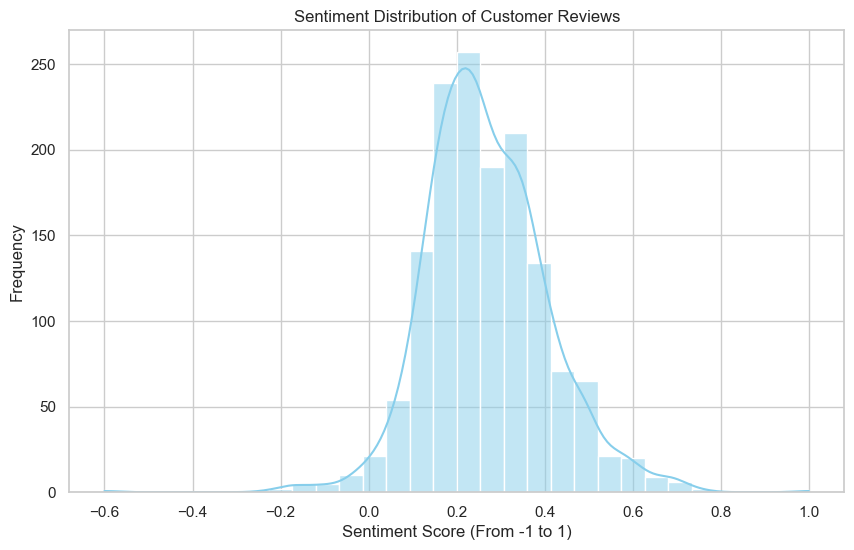

In [28]:

# Step 4: Visualize the sentiment distribution with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['review_sentiment'], kde=True, bins=30, color='skyblue')
plt.title('Sentiment Distribution of Customer Reviews')
plt.xlabel('Sentiment Score (From -1 to 1)')
plt.ylabel('Frequency')
plt.show()


### 🎯 What the Graph Tells Us

This bell-shaped curve gives us a nice overview of how customers feel about their purchases.

- The majority of reviews fall around a **sentiment score of ~0.25**, which leans **slightly positive** — that’s great news! 🎉
- The shape is fairly **symmetric**, indicating a healthy mix of review tones, with most not being extremely negative or overly positive.
- A small number of reviews dip into the **negative range**, but they’re clearly the minority.

#### 📌 What This Means:
Customers overall are feeling pretty **satisfied**, but not overly enthusiastic. Think of it as a vibe check that says:  
> “Yeah, it’s pretty good... not mind-blowing, but solid.” 😄

This kind of distribution is typical in large datasets where most people are generally content but not all are thrilled. Next, let's see how this sentiment varies across different **product categories**!


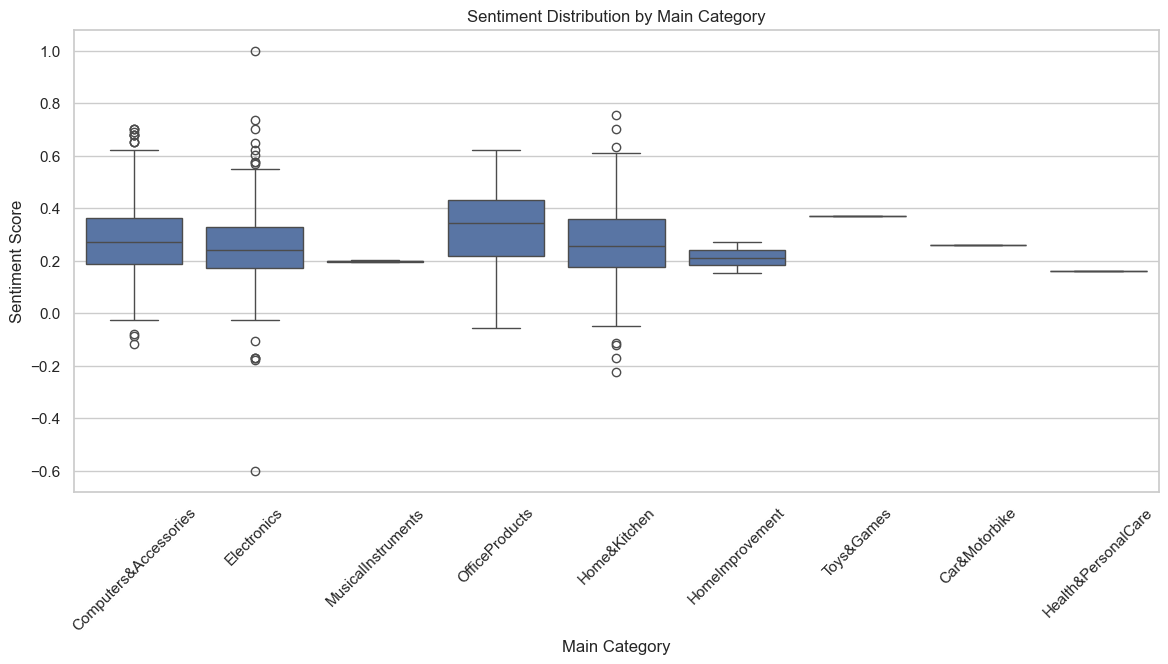

In [29]:

# Step 5: Visualize sentiment by category using a box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='main_category', y='review_sentiment', data=df)
plt.xticks(rotation=45)
plt.title('Sentiment Distribution by Main Category')
plt.ylabel('Sentiment Score')
plt.xlabel('Main Category')
plt.show()

### 📦 Sentiment by Category — What's the Mood?

From the box plots above, we can spot a few interesting patterns:

- The **top 4 categories** show a clear sentiment distribution, with **medians between 0.2 and 0.3** — meaning customers generally left **slightly positive reviews**.
- **Office Products** stands out with the **highest median sentiment**, suggesting people are particularly happy with what they’re buying in that category. 🖨️😊
- The remaining categories don’t show a well-defined box shape — this could be due to **fewer data points**, **outliers**, or **skewed sentiment scores**, making it harder to get a clear picture.

#### 💭 In short:
The box plots confirm that most reviews are **mildly positive**, but some categories may need more data or deeper digging to reveal clear trends. Let’s keep exploring!


In [30]:
# Step 6: Compare average sentiment for top-rated and low-rated products
top_rated = df[df['rating'] > 4.5]
low_rated = df[df['rating'] < 2.5]

# Calculate average sentiment for top-rated and low-rated products
top_rated_sentiment = top_rated['review_sentiment'].mean()
low_rated_sentiment = low_rated['review_sentiment'].mean()

# Output the average sentiment for top-rated and low-rated products
print(f"Average Sentiment for Top-Rated Products: {top_rated_sentiment:.2f}")
print(f"Average Sentiment for Low-Rated Products: {low_rated_sentiment:.2f}")

Average Sentiment for Top-Rated Products: 0.35
Average Sentiment for Low-Rated Products: 0.63


### 🌟 Sentiment vs. Star Ratings — A Curious Twist!

Here’s what we found:
- 🟢 **Top-Rated Products** (above 4.5 stars): Average Sentiment = **0.35**
- 🔴 **Low-Rated Products** (below 2.5 stars): Average Sentiment = **0.63**

#### 😮 Wait... What?

This might seem **unexpected** at first — why do low-rated products have **more positive review sentiment** on average?
Let's check why the average is higher:

In [31]:
print(f"Number of reviews in top-rated: {len(top_rated)}")
print(f"Number of reviews in low-rated: {len(low_rated)}")

Number of reviews in top-rated: 28
Number of reviews in low-rated: 2


### 😂 Plot Twist: Our "Big Discovery" Was Just Two Guys

At first, we thought we had uncovered a deep insight —  
"Why are low-rated products getting **more positive** reviews than top-rated ones? 🤯"

So we checked the numbers...  
- ⭐ Top-Rated Products: 28 reviews  
- 😬 Low-Rated Products: **2 reviews**

Yup. Just **two people**. That’s it.  
Basically, our dramatic chart was built on the opinions of a **very tiny fan club** (or maybe sarcastic reviewers).

#### 🧠 Moral of the story:
Before jumping to conclusions, always ask:  
> “Wait... how many people actually said that?”  
Otherwise, you might end up trying to explain the behavior of a crowd that... doesn’t exist. 😅


---
# Thank You for Exploring This Data Science Project!

We've navigated through the Amazon sales data, uncovering valuable insights about product pricing, customer sentiments, and category trends. From data cleaning to visualizing relationships, it's been an exciting exploration of how data science can provide deeper insights into e-commerce.

I hope this journey helped enhance your understanding of data analysis and machine learning techniques! If you have any questions or want to dive deeper into any part of the analysis, feel free to reach out. 

Good luck with your future data science projects! 🚀

Until next time! 👋
